In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

In [2]:
X = np.array([[-2], [-1], [0], [2]])
y = np.array([2, 3, 1, -1])

# Add column with ones to handle the bias coefficient.
X = np.concatenate([np.ones((np.size(X, 0), 1)), X], axis=1)
print(X)

# Compute weights.
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(w)

# Compute mean squared error.
error = X.dot(w) - y
print(error)
print(y.size)
print(error.dot(error) / y.size)

[[ 1. -2.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  2.]]
[ 1.02857143 -0.88571429]
[ 0.8        -1.08571429  0.02857143  0.25714286]
4
0.4714285714285714


In [3]:
# Query.
x = np.array([1, 1])
print(w.dot(x))

0.1428571428571428


In [4]:
# Plot hyperplane 2d.
def plot_hyperplane_2d(ax, w):
    x = np.linspace(-3, 3, 10)
    ax.plot(x, w[0] + w[1]*x, 'b-')

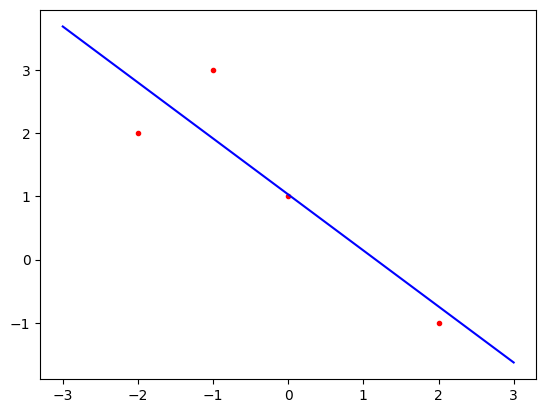

In [5]:
ax = plt.figure().gca()
ax.plot(X[:,1], y, 'r.')
plot_hyperplane_2d(ax, w)

### Exercise 2

In [6]:
X = np.array([[1, 1], [2, 1], [1, 3], [3, 3]])
y = np.array([1.4, 0.5, 2, 2.5])

# Add column with ones to handle the bias coefficient.
X = np.concatenate([np.ones((np.size(X, 0), 1)), X], axis=1)

# Compute weights.
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(w)

# Compute mean squared error.
error = X.dot(w) - y
print(error.dot(error) / y.size)

[0.275 0.02  0.645]
0.13224999999999998


In [7]:
# Query.
x = np.array([1, 2, 3])
print(w.dot(x))

2.2499999999999987


In [8]:
# Plot hyperplane 3d.
def plot_hyperplane_3d(ax, w):
    x1 = np.linspace(0, 4, 10)
    x2 = np.linspace(0, 4, 10)
    a, b = np.meshgrid(x1,x2)
    N = x1.size
    X = np.array([np.ones(N**2), a.ravel(), b.ravel()]).transpose()
    o = X.dot(w)
    ax.plot_surface(a, b, np.reshape(o,(N,N)), alpha=0.5,
                    linewidth=0, antialiased=True)


In [9]:

ax = plt.figure().gca(projection='3d')
ax.scatter(X[:,1], X[:,2], y, color='red')
plot_hyperplane_3d(ax, w)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

### Exercise 3

In [ ]:
X_original = np.array([[3], [4], [6], [10], [12]])
y = np.array([1.5, 9.3, 23.4, 45.8, 60.1])


In [ ]:
# Log transformation.
X = np.log(X_original)

# Add column with ones to handle the bias coefficient.
X = np.concatenate([np.ones((np.size(X, 0), 1)), X], axis=1)

# Compute weights.
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(w)

# Compute mean squared error.
error = X.dot(w) - y
print(error.dot(error) / y.size)

# o = w0 + w1*u1 + w2*u2, u1 = x1**2, u2 = x2**2
# o = w0 + w1*x1**2 + w2*x2**2

In [ ]:
# Plot hyperplane 2d.
def plot_hyperplane_2d(ax, w):
    x = np.linspace(2, 13)
    ax.plot(x, w[0] + w[1]*np.log(x), 'b-')
    
ax = plt.figure().gca()
ax.plot(X_original, y, 'r.')
plot_hyperplane_2d(ax, w)

In [ ]:
# Quadratic transformation.
X = X_original**2

# Add column with ones to handle the bias coefficient.
X = np.concatenate([np.ones((np.size(X, 0), 1)), X], axis=1)

# Compute weights.
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(w)

# Compute mean squared error.
error = X.dot(w) - y
print(error.dot(error) / y.size)

# o = w0 + w1*u1 + w2*u2, u1 = x1**2, u2 = x2**2
# o = w0 + w1*x1**2 + w2*x2**2

In [ ]:
# Plot hyperplane 2d.
def plot_hyperplane_2d(ax, w):
    x = np.linspace(2, 13)
    ax.plot(x, w[0] + w[1]*(x**2), 'b-')
    
ax = plt.figure().gca()
ax.plot(X_original, y, 'r.')
plot_hyperplane_2d(ax, w)

### Exercise 4

In [ ]:
#inputs = np.array([[1, 1], [2, 1], [1, 3], [3, 3]])
#labels = np.array([1, 1, 0, 0])
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([0, 1, 1, 0])

num_examples, num_features = np.shape(inputs)
print(np.shape(inputs))
print(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

In [ ]:
# One epoch of the *batch* gradient descent algorithm for logistic regression.
def logistic_regression_gd_epoch(inputs, labels, w, eta):
    # vector of probabilities of size num_inputs.
    probs = 1 / (1 + np.exp(-inputs.dot(w)))
    # gradient of loss function; vector of size num_features.
    gradient = inputs.T.dot(probs - labels)
    # Gradient descent update.
    w -= eta * gradient

In [ ]:
# Evaluate cross-entropy loss.
def evaluate_loss(inputs, labels, w):
    # Evaluate loss function.
    probs = 1 / (1 + np.exp(-inputs.dot(w)))
    print(probs.shape)
    loss = -labels.dot(np.log(probs)) - (1 - labels).dot(np.log(1 - probs))
    print("Loss = %f" % loss)
    return loss


In [ ]:
# One epoch of the *stochastic* gradient descent algorithm for logistic regression.
def logistic_regression_sgd_epoch(inputs, labels, w, eta):
    for x, y in zip(inputs, labels):
        # Sigmoid function.
        # This gives the probability that the label is 1,
        # according to the model.
        y_hat = 1 / (1 + np.exp(-w.dot(x)))
        # SGD update.
        w += eta * (y - y_hat) * x

In [ ]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

In [ ]:
# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1
    
# Run 1 epoch of gradient descent.
for epoch in range(10):
    print("Epoch %d" % (epoch + 1))
    logistic_regression_gd_epoch(inputs, labels, w, eta)
    evaluate_loss(inputs, labels, w)
    print(w)
    plot_separation_line(inputs, labels, w)
    
plot_separation_line(inputs, labels, w)

In [ ]:
# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1
    
# Run 1 epoch of stochastic gradient descent.
for epoch in range(10):
    print("Epoch %d" % (epoch + 1))
    logistic_regression_sgd_epoch(inputs, labels, w, eta)
    evaluate_loss(inputs, labels, w)
    print(w)
    plot_separation_line(inputs, labels, w)
    
plot_separation_line(inputs, labels, w)

### Exercise 5

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()

In [ ]:
inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

num_examples, num_features = np.shape(inputs)
num_labels = np.max(labels)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

print(data.DESCR)

In [ ]:
# Split between train and test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

In [ ]:
# One epoch of the *stochastic* gradient descent algorithm for logistic regression.
def multi_class_logistic_regression_sgd_epoch(inputs, labels, W, eta):
    for x, y in zip(inputs, labels):
        # Label scores according to the model (num_labels x 1).
        label_scores = W.dot(x)[:, None]
        # One-hot vector with the true label (num_labels x 1).
        y_one_hot = np.zeros((np.size(W, 0), 1))
        y_one_hot[y] = 1
        # Softmax function.
        # This gives the label probabilities according to the model (num_labels x 1).
        label_probabilities = np.exp(label_scores) / np.sum(np.exp(label_scores))
        # SGD update. W is num_labels x num_features.
        W += eta * (y_one_hot - label_probabilities) * x[None, :]

In [ ]:
# Evaluate cross-entropy loss.
def evaluate_loss(inputs, labels, w):
    loss = 0.
    for x, y in zip(inputs, labels):
        # Label scores according to the model (num_labels x 1).
        label_scores = W.dot(x)
        # One-hot vector with the true label (num_labels x 1).
        y_one_hot = np.zeros(np.size(W, 0))
        y_one_hot[y] = 1
        # Softmax function.
        # This gives the label probabilities according to the model (num_labels x 1).
        label_probabilities = np.exp(label_scores) / np.sum(np.exp(label_scores))
        loss += -y_one_hot.dot(np.log(label_probabilities))
    print("Loss = %f" % loss)
    return loss   

In [ ]:
# Run classifier.
def multi_class_classify(inputs, W):
    predicted_labels = []
    for x in inputs:
        y_hat = np.argmax(W.dot(x))
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

In [ ]:
# Compute accuracy of predicted labels.
def evaluate(predicted_labels, gold_labels):
    accuracy = np.mean(predicted_labels == gold_labels)
    return accuracy

In [ ]:
# Initialize all weights to 0 (including the bias)
W = np.zeros((num_labels, num_features+1))  # num_labels x (num_features + 1)

# Learning rate.
eta = 0.001  
    
# Run 100 epochs of perceptron.
train_accuracies = []
test_accuracies = []
losses = []
for epoch in range(100):
    print("Epoch %d" % (epoch + 1))

    # Run 1 epoch of training.
    multi_class_logistic_regression_sgd_epoch(X_train, y_train, W, eta)
    loss = evaluate_loss(X_train, y_train, W)
    losses.append(loss)
    
    # Predict on training set and evaluate.
    predicted_labels = multi_class_classify(X_train, W)
    accuracy = evaluate(predicted_labels, y_train)
    print("Accuracy (training set): %f" % accuracy)
    train_accuracies.append(accuracy)
    
    # Predict on test set and evaluate.
    predicted_labels = multi_class_classify(X_test, W)
    accuracy = evaluate(predicted_labels, y_test)
    print("Accuracy (test set): %f\n" % accuracy)
    test_accuracies.append(accuracy)

# Plot loss as a function of number of epochs.
plt.plot(range(100), losses, 'b-', label='train loss')
plt.legend()
plt.show()

# Plot train and test accuracies as a function of number of epochs.
plt.plot(range(100), train_accuracies, 'b-', label='train acc')
plt.plot(range(100), test_accuracies, 'r-', label='test acc')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, penalty='none')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))